<a href="https://colab.research.google.com/github/78furu/deeplea_adv/blob/master/deeplea_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

%cd '/content/drive/MyDrive/github_repos/deeplea_adv/'
%pwd

import unet

Mounted at /content/drive
/content/drive/MyDrive/github_repos/deeplea_adv


In [3]:
# Import libraries
import numpy as np
from matplotlib import pyplot as plt

import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
from torchsummary import summary
from preproc import training_and_eval, load_and_preprocess_data

print(f"Pytorch version: {torch.__version__}")

# Set the runtime environment to GPU in: Edit -> Notebook settings or Runtime -> Change runtime type  
if torch.cuda.is_available() is False:
    raise Exception("GPU device not found, runtime environment should be set to GPU")
print(f"Using GPU device: {torch.cuda.get_device_name(torch.cuda.current_device())}")

# Seed random number generator
torch.manual_seed(0)
np.random.seed(0)

Pytorch version: 1.8.0+cu101
Using GPU device: Tesla K80


In [4]:
net = unet.unet_model.UNet(n_channels=3, n_classes=10)
net.input_size=(3, 32, 32)
net.num_classes = 10
MODEL = net.to(torch.cuda.current_device())


In [5]:
summary(MODEL, MODEL.input_size)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,792
       BatchNorm2d-2           [-1, 64, 32, 32]             128
              ReLU-3           [-1, 64, 32, 32]               0
            Conv2d-4           [-1, 64, 32, 32]          36,928
       BatchNorm2d-5           [-1, 64, 32, 32]             128
              ReLU-6           [-1, 64, 32, 32]               0
        DoubleConv-7           [-1, 64, 32, 32]               0
         MaxPool2d-8           [-1, 64, 16, 16]               0
            Conv2d-9          [-1, 128, 16, 16]          73,856
      BatchNorm2d-10          [-1, 128, 16, 16]             256
             ReLU-11          [-1, 128, 16, 16]               0
           Conv2d-12          [-1, 128, 16, 16]         147,584
      BatchNorm2d-13          [-1, 128, 16, 16]             256
             ReLU-14          [-1, 128,

Files already downloaded and verified
Files already downloaded and verified
Dataset: cifar10 
 Image shape: (3, 32, 32) 
 Number of train images: 50000 
 Number of test images: 10000 
 Number of classes: 10 



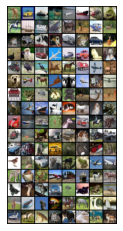

Model summary
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,792
       BatchNorm2d-2           [-1, 64, 32, 32]             128
              ReLU-3           [-1, 64, 32, 32]               0
            Conv2d-4           [-1, 64, 32, 32]          36,928
       BatchNorm2d-5           [-1, 64, 32, 32]             128
              ReLU-6           [-1, 64, 32, 32]               0
        DoubleConv-7           [-1, 64, 32, 32]               0
         MaxPool2d-8           [-1, 64, 16, 16]               0
            Conv2d-9          [-1, 128, 16, 16]          73,856
      BatchNorm2d-10          [-1, 128, 16, 16]             256
             ReLU-11          [-1, 128, 16, 16]               0
           Conv2d-12          [-1, 128, 16, 16]         147,584
      BatchNorm2d-13          [-1, 128, 16, 16]             256
             ReLU-14     

RuntimeError: ignored

In [9]:

DATASET_NAME = 'cifar10'
MODEL = net.to(torch.cuda.current_device())
 
# TODO
OPTIMIZER =  torch.optim.Adam(MODEL.parameters(), lr=1e-5)  
BATCH_SIZE = 128  
NUM_EPOCHS = 200 

trained_model, loss_and_accuracy_history = training_and_eval(DATASET_NAME, 
                                                             MODEL,
                                                             OPTIMIZER,
                                                             BATCH_SIZE, 
                                                             NUM_EPOCHS,
                                                             augment = False)

Files already downloaded and verified
Files already downloaded and verified
Dataset: cifar10 
 Image shape: (3, 32, 32) 
 Number of train images: 50000 
 Number of test images: 10000 
 Number of classes: 10 



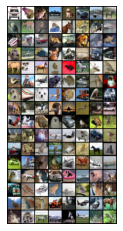

In [10]:

train, test = load_and_preprocess_data("cifar10", BATCH_SIZE)

In [11]:
train.dataset.classes

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [54]:
length = 10
ratio = pow(0.01/10, 1/9)
start = 10
progression = np.array([start * ratio**i for i in range(length)])

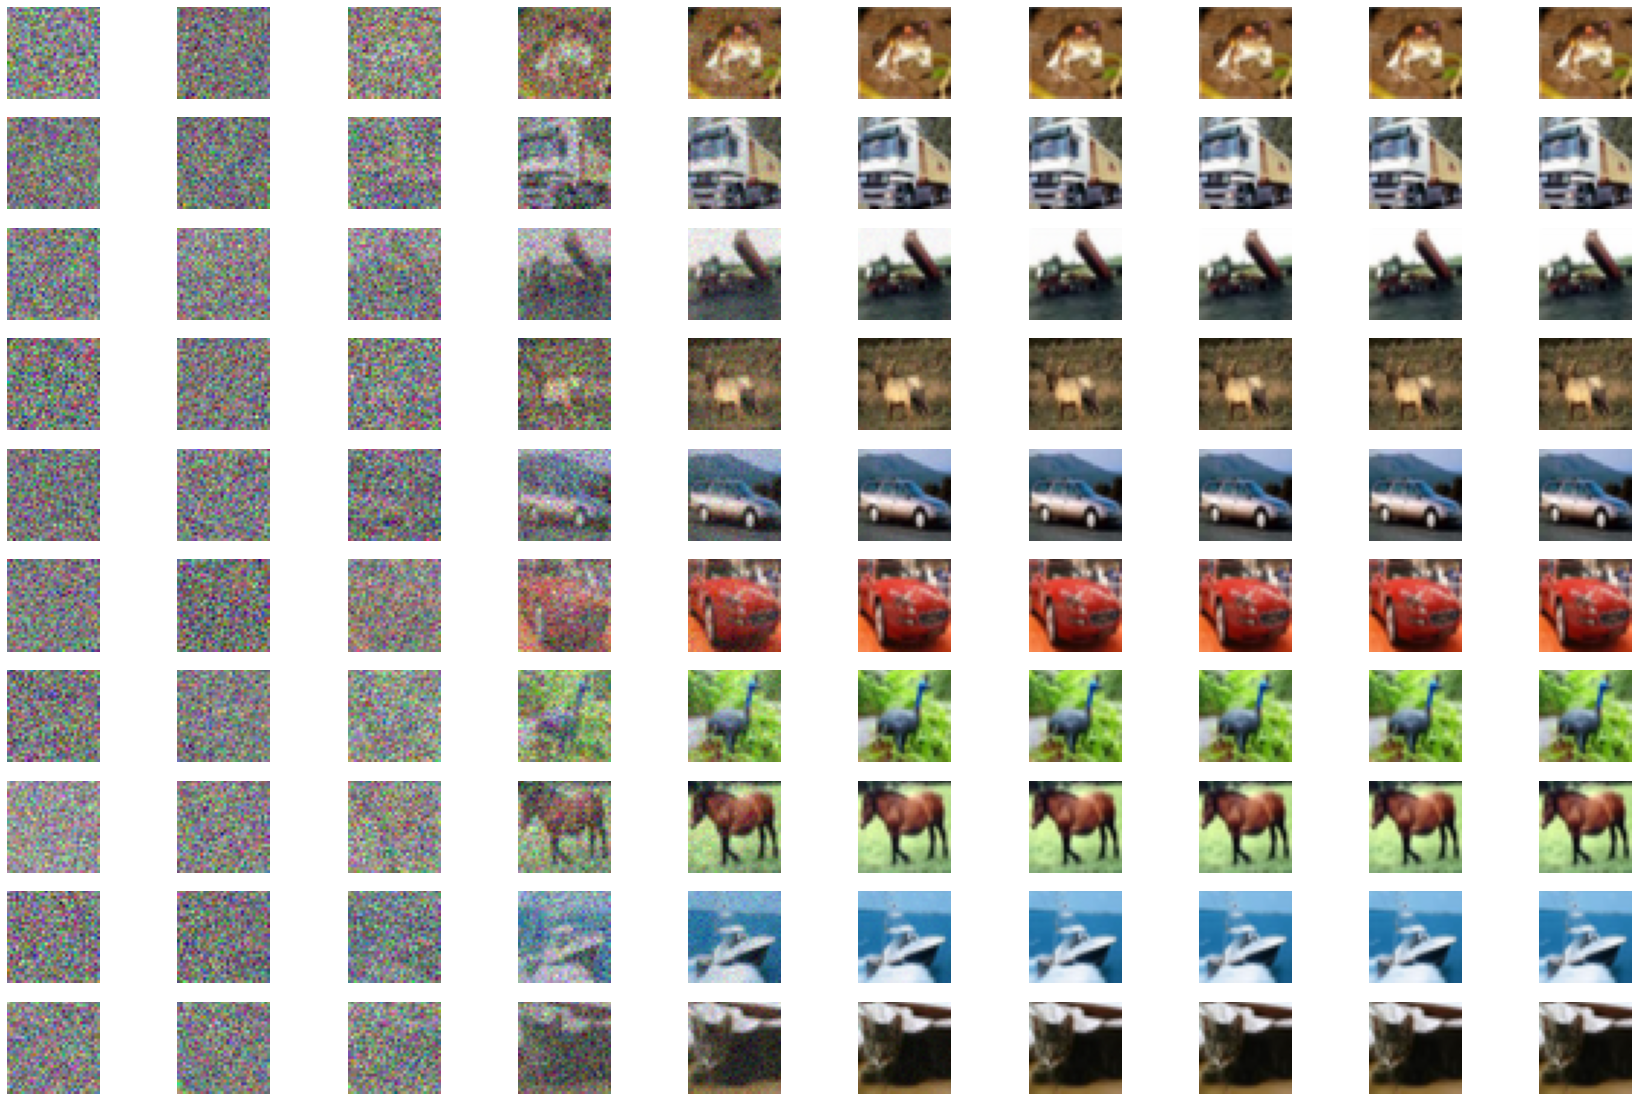

In [59]:
num_of_images = 10
epses = np.logspace(-5, -1, 9)

fig, axes = plt.subplots(num_of_images,progression.shape[0], figsize=(30, 20))
for im,c in zip(train.dataset.data, range(num_of_images)):
    for eps, ax in zip(progression, axes[c, :]):
        eps = (eps**2/progression[-1]**2)*2e-5
        im_ = im/255 + np.random.normal(scale=eps,size=im.shape)
        im_ = (im_-np.min(im_))/(np.max(im_)-np.min(im_))
        ax.imshow(im_)
        ax.axis('off')

In [60]:
train